# 

# Lab 3 Project (Titanic)

- **Author:** Aaron Gilllespie 
- **Date:** 2025-03-28
- **Objective:** Utilizing data from the Titanic manifest to train & test various types of classfiers.

This code base is being created in the course of completing module 3 of CSIS 44-670 from NW Missouri University. In this Jupyter Notebook which we will analyze data representing the passengers from the RMS Titanic, which sank in a very famous James Cameron movie (also real life). We are utilizing this dataset to, which [some research suggests](https://www.geeksforgeeks.org/python-titanic-data-eda-using-seaborn/) is a commonly utilized dataset for getting started with Machine Learning. In essence, this is the `hello world!` of my advnetures with machine learning. 

In this lab we're exploring 3 common types of classifiers: 

1. Decision Tree Classifier (DT)
2. Support Vector Machine (SVM)
3. Neural Network (NN)


## Section 1. Import and Inspect the Data

In this section we load a sample dataset from Seaborn's library into a DataFrame and do a standard set of what I'll call "getting to know you" methods to get a view of the dataset schema, its contents, the proportions of missing values, and any correlations that exist between the numerical columns.

Importing some standard libraries for working with data in Python.

In [269]:
# all imports get moved to the top - import each only once

import seaborn as sns
import pandas as pd

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt




Loading the Titanic sample dataset from Seaborn. One of what appears to be [about 20 possible options](https://github.com/mwaskom/seaborn-data).

In [270]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

## Section 2. Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data

In this subsection we impute missing values for age with the median, and fill missing values from 'embark_town' with the mode.

In [271]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

### 2.2 Feature Engineering

We will be adding:

1. family_size - number of family members on board
2. Convert categorical "sex" to numeric
3. Convert categorical "embarked" to numeric
4. Binary feature - convert "alone" to numeric

In [272]:
# Create new features
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target

In this section we are seleting features from the dataset we will use to create a machine learning models from. These two features will be utilized to target the value of the `survived` column.

I believe in the James Cameron movie `Titanic` they were saying 'Women and Children first' - so I'm making my selection to see if that bares out in the dataset

- `sex` - to catch the "women" criteria
- `age` - to catch the "and children" criteria

### 3.2 Define X (features) and y (target)

Here's wehere the actual assignment of the features & target are happening (the Xes and Y).

In [273]:
# Case 1: alone only 
# X = titanic[['alone']]
# y = titanic['survived']

# Case 2: age only (or your choice)
# X = titanic[['age', 'class']]
# y = titanic['survived']

# Case 3: age + family_size (or your choice)
X = titanic[['age', 'sex']]
y = titanic['survived']

### Reflection 3:

**Why are these features selected?**
I chose age and sex to continue the trend I set in lab 02 to see if the whole "women and children first" thing was real or just an old sailor's tale. 

**Are there features that are likely to be highly predictive of survival?**
Absolutely, we would expect there to be features in a dataset like this that are highly correlated. We saw in Lab 02 that "Class" was one of those features. In datasets like these, where the enviornment is valid, you can expect to find meaningful correlations (as opposed to cases that Daniel Kahneman would say are _invalid_ for such an analysis to have predictive power).


## Section 4. Train a Classification Model (Decision Tree)

The first classifier we are testing is a decision tree, in which "left or right" type binary decisions are generated, ultimately resulting in a tree whose leaves are the classes that are being targeted.

### 4.1 Split the Data

Splitting the data allows us to both train a model and test the trained model. We use a StratifiedShuffleSplit to ensure an even class distribution.

In [274]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

Train size:  712 Test size:  179


### 4.2 Create and Train Model (Decision Tree)

In [275]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### 4.3 Predict and Evaluate Model Performance

To evaluate the performance of binary classifiers, such as our case - where we are trying to classify the binary outcome 0 (died) and 1 (survived), you can use an **Evaluation Matrix**. An evaluation matrix is a 2x2 grid, where the cells read:

| TP | FP |
| -- | -- |
| FN | TN |

- TP = True Positive
- FP = False Positive
- FN = False Negative
- TN = True Negative

Using these numbers we can calculate Accuracy, Precision, and Sensitivity.

#### Accuracy

What percent of values are correct.

`accurancy = true results / all results`

##### Precision

The percent of **positive** results that are correct.

`precision = true positives / (true & false positives)`

##### Sensitivity

The percentage of cases the model correctly identified as positive. 

`sensitivity = true positives / (true positives & false negatives)`

A test that **always returns positive** would have sensitivity of 100%. This would be highly _sensitive_, but incredibly inaccurate and thus not useful.

In [276]:
# Predict and evaluate training data (X train)
y_pred = tree_model.predict(X_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y_train, y_pred))  

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       439
           1       0.81      0.71      0.76       273

    accuracy                           0.83       712
   macro avg       0.82      0.80      0.81       712
weighted avg       0.82      0.83      0.82       712



In [277]:
# Predict and evaluate test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       110
           1       0.76      0.61      0.68        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.75       179
weighted avg       0.78      0.78      0.77       179



### 4.4 Report Confusion Matrix (as a heatmap)

A visualization of the confusion matrix.

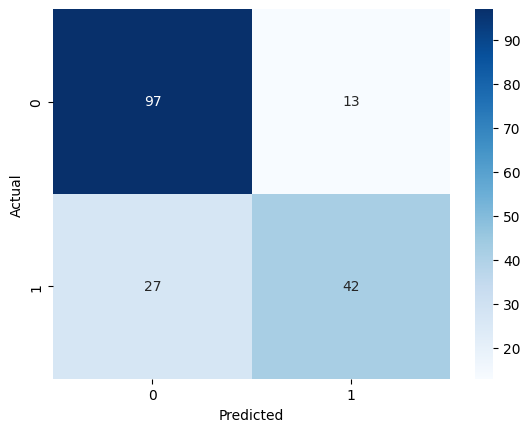

In [278]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 

### 4.5 Report Decision Tree Plot

A decision tree draws out a _tree_. This is our example tree:

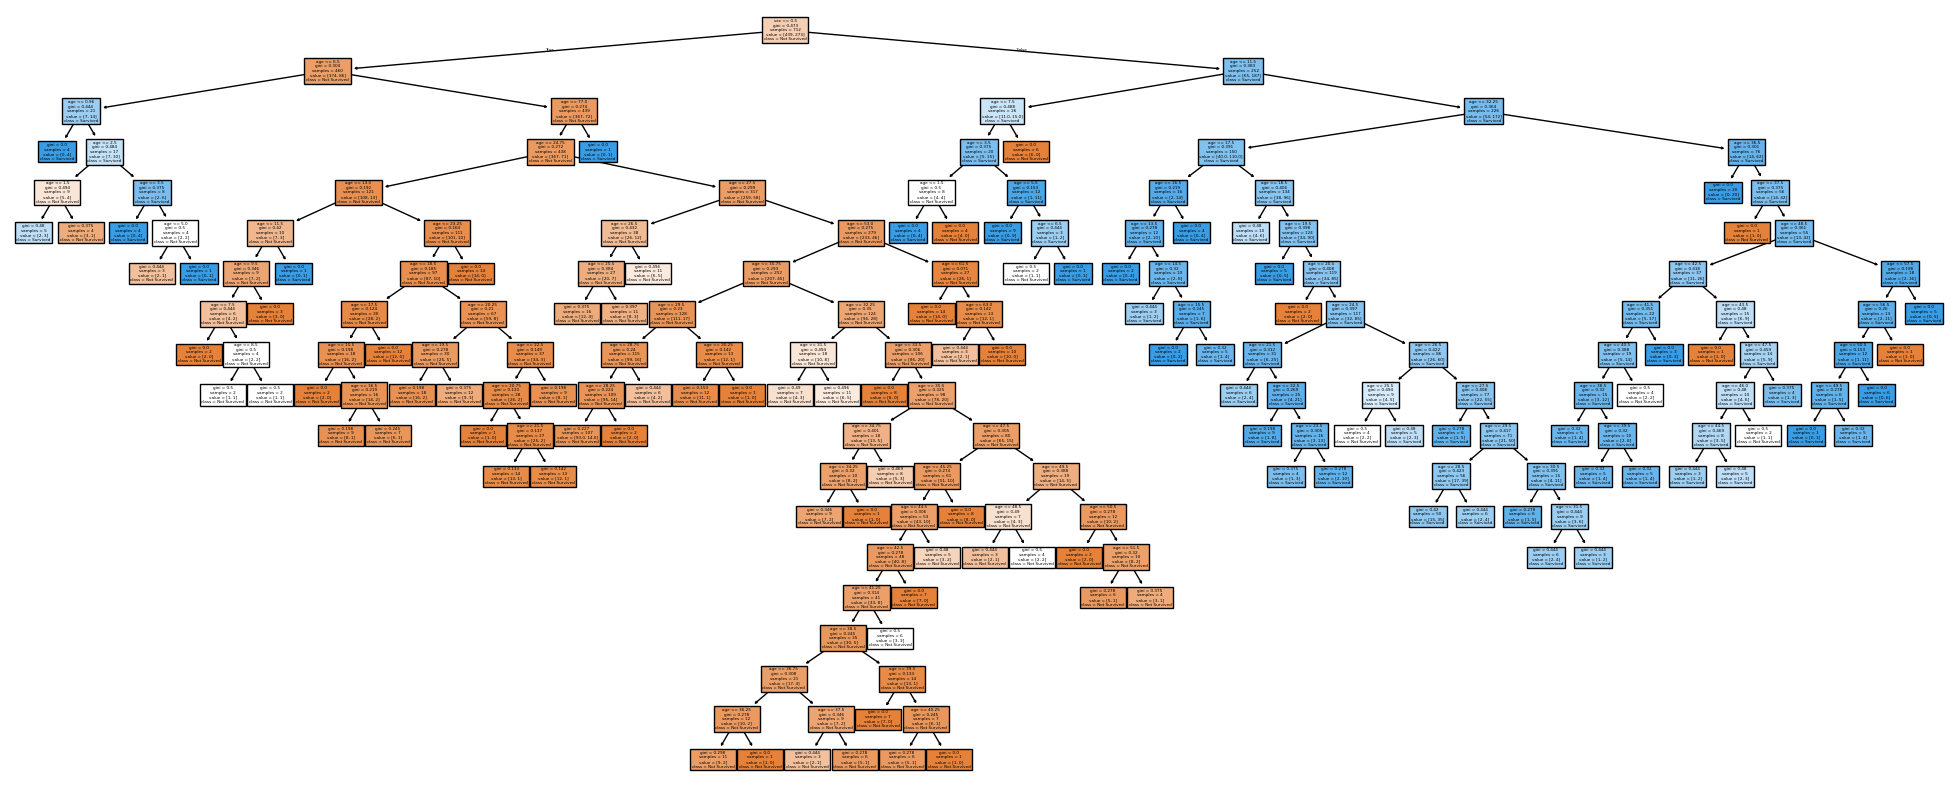

In [279]:
fig = plt.figure(figsize=(25,10))

# plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, fontsize=30, rounded=True) # <- works better for small trees

plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic.png")

### Reflection 4:

**How well did the different cases perform?**  

Overall - fairly well. 

**Are there any surprising results?**

In my case, *class* didn't really assist in the predictive power of the classifier... which is **very** surprising given the ratios discovered last week. 

**Which inputs worked better?**

The best results of all came from combining `age` and `sex`. The full table of results is at the bottom of this notebook.
